# Part 1

In [1]:
import pandas as pd

# Create a DataFrame, with index column is "TIME"
energy_supply_df = pd.read_csv("data/DP_Live_energy_Renewable.csv", 
                               skiprows=5, 
                               index_col="TIME",
                               parse_dates = ["TIME"],
                               )
energy_supply_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes,Region
TIME,,,,,,,,
1960-01-01,AUS,RENEWABLE,TOT,KTOE,A,4437.6564,NaN,East Asia & Pacific
1961-01-01,AUS,RENEWABLE,TOT,KTOE,A,4491.2248,NaN,East Asia & Pacific
1962-01-01,AUS,RENEWABLE,TOT,KTOE,A,4407.7864,NaN,East Asia & Pacific
1963-01-01,AUS,RENEWABLE,TOT,KTOE,A,4629.4163,NaN,East Asia & Pacific
1964-01-01,AUS,RENEWABLE,TOT,KTOE,A,4498.0414,NaN,East Asia & Pacific


We want to compare the renewable energy in different region, so we first need to have a `DataFrame` that only contain renewable energy, the `DataFrame` called `renewable_supply_df`.

In [2]:
indicator = energy_supply_df["INDICATOR"]

renewable_supply_df = energy_supply_df[indicator == "RENEWABLE"]

renewable_supply_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes,Region
TIME,,,,,,,,
1960-01-01,AUS,RENEWABLE,TOT,KTOE,A,4437.6564,NaN,East Asia & Pacific
1961-01-01,AUS,RENEWABLE,TOT,KTOE,A,4491.2248,NaN,East Asia & Pacific
1962-01-01,AUS,RENEWABLE,TOT,KTOE,A,4407.7864,NaN,East Asia & Pacific
1963-01-01,AUS,RENEWABLE,TOT,KTOE,A,4629.4163,NaN,East Asia & Pacific
1964-01-01,AUS,RENEWABLE,TOT,KTOE,A,4498.0414,NaN,East Asia & Pacific


In the table, there are seven different region, we put the name of region in a list called `region_list`. A function was created to have a `DataFrame` for each different region.

In [3]:
# List of region's name
region_list = ["East Asia & Pacific", 
               "Europe & Central Asia", 
               "North America", 
               'Latin America & Caribbean', 
               'Middle East & North Africa', 
               'South Asia', 
               'Sub-Saharan Africa']

region = renewable_supply_df["LOCATION"]

# Define a function that create a filter to distinguish the region 
# The data for three regions didn't start at same time.
# A proper time range was chosen to compare the data. Include this in the fucntion 'region_distinguisher'
def region_distinguisher(name, start_time, end_time):
    region_filt = (region == name)
    one_region_df = renewable_supply_df[region_filt]
    one_region_df = one_region_df.loc[start_time:end_time] # Select time period.
    return one_region_df


Three region were compared, they are: East Asia & Pacific, Europe & Central Asia, and Latin America & Caribbean. The trend of renewable energy in these three regions. A graph was ploted to do that. We noticed that the time range for three regions is different. Therefore, we used the `one_region_df.loc[start_time:end_time]` in the function.

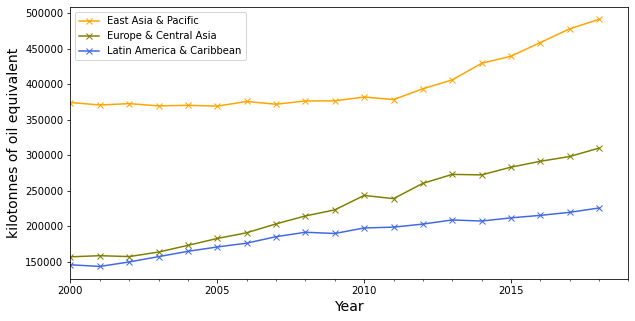

In [18]:
import matplotlib.pyplot as plt

start = "2000" # When the data begin
end = "2019" # When the data end

eastasia = region_distinguisher(region_list[0], start, end)
europe = region_distinguisher(region_list[1], start, end)
latin = region_distinguisher(region_list[3], start, end)

# Define a function to plot the graph
def plot(name, colorname, label = None):
    name.plot.line(y="Value",
                  color = colorname, label=label, ax=ax, marker = "x")
  
    ax.set_xlabel("Year", fontsize=14) # The x-axis label and its font size
    ax.set_ylabel("kilotonnes of oil equivalent", fontsize=14) # The y-axis label and its font size

fig, ax = plt.subplots(figsize=(10,5))

# Plot the graph, using the function we defined. 
plot(eastasia, "orange", region_list[0])
plot(europe, "olive", region_list[1])
plot(latin, "royalblue", region_list[3])

fig.savefig("renewable_generation.png") # Save the image

In [5]:
combine_energy_supply_df = pd.read_csv("data/API_SP.COMBINED.TOTL_DS2_en_csv_v2.csv",
                                      index_col = "Country Code")
combine_energy_supply_df.head()

,Country Name,Year,Population,GDP,Coal (% of total),Oil (% of total),Natural Gas (% of total),Nuclear (% of total),Hydroelectric (% of total),Renewable excluding hydroelectric (% of total),Renewable excluding hydroelectric (kWh)
Country Code,,,,,,,,,,,
ABW,Aruba,1960,54208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABW,Aruba,1961,55434.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABW,Aruba,1962,56234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABW,Aruba,1963,56699.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABW,Aruba,1964,57029.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
country_code_df = pd.read_csv("data/Metadata_Country_API_SP.COMBINED.TOT_DS2_en_csv_v2.csv",
                             index_col="Country Code")
country_code_df.head()

,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
Country Code,,,,,
ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


Now, we want to compare the percentage of renewable energy in those three different regions. First, we need to use filter to find the country code of each region. 

In [7]:
# This function will return the DataFrame that only contain one region. 
def region_renewable_selector(regionname):
    # country_code_df provide the country code of each region.
    # We need to use the "TableName" to find the code
    country = country_code_df[country_code_df["TableName"]==regionname] 
    # Use the contry code founded to extract data from the DataFrame: combine_energy_supply_df
    country_energy_df = combine_energy_supply_df.loc[country.index]
    return country_energy_df.set_index("Year")

eastasia_percentage_df = region_renewable_selector(region_list[0])
eastasia_percentage_df.head()

,Country Name,Population,GDP,Coal (% of total),Oil (% of total),Natural Gas (% of total),Nuclear (% of total),Hydroelectric (% of total),Renewable excluding hydroelectric (% of total),Renewable excluding hydroelectric (kWh)
Year,,,,,,,,,,
1960,East Asia & Pacific,1.041674e+09,1.546117e+11,NaN,NaN,NaN,NaN,NaN,NaN,7.100000e+08
1961,East Asia & Pacific,1.043657e+09,1.551481e+11,NaN,NaN,NaN,NaN,NaN,NaN,8.270000e+08
1962,East Asia & Pacific,1.058120e+09,1.583642e+11,NaN,NaN,NaN,NaN,NaN,NaN,1.108000e+09
1963,East Asia & Pacific,1.083884e+09,1.767038e+11,NaN,NaN,NaN,NaN,NaN,NaN,1.371000e+09
1964,East Asia & Pacific,1.109291e+09,2.026839e+11,NaN,NaN,NaN,NaN,NaN,NaN,1.562000e+09


Do the same thing for other two regions.

In [8]:
europe_percentage_df = region_renewable_selector(region_list[1])
latin_percentage_df = region_renewable_selector(region_list[3])

Now we want to plot the graph of the percentage contribution of renewable enrgy in each region. Select the same time range, from 2000 to 2019. 

In [9]:
eastasia_percentage_df = eastasia_percentage_df.loc[2000:2019]
europe_percentage_df = europe_percentage_df.loc[2000:2019]
latin_percentage_df = latin_percentage_df.loc[2000:2019]
europe_percentage_df.head()

,Country Name,Population,GDP,Coal (% of total),Oil (% of total),Natural Gas (% of total),Nuclear (% of total),Hydroelectric (% of total),Renewable excluding hydroelectric (% of total),Renewable excluding hydroelectric (kWh)
Year,,,,,,,,,,
2000,Europe & Central Asia,861270071.0,1.004666e+13,27.694497,5.217093,21.788229,25.337145,17.592535,1.383904,6.453300e+10
2001,Europe & Central Asia,862339994.0,1.015734e+13,27.321725,4.768888,22.156195,25.706331,17.425859,1.505780,7.151500e+10
2002,Europe & Central Asia,863908064.0,1.109969e+13,27.319818,4.952118,22.833016,25.907753,16.070390,1.816926,8.691500e+10
2003,Europe & Central Asia,866189044.0,1.351814e+13,27.891791,4.534247,23.919363,25.604839,14.936009,2.105511,1.033720e+11
2004,Europe & Central Asia,868783653.0,1.575840e+13,26.591685,3.798195,24.870127,25.275467,15.811541,2.580185,1.295760e+11


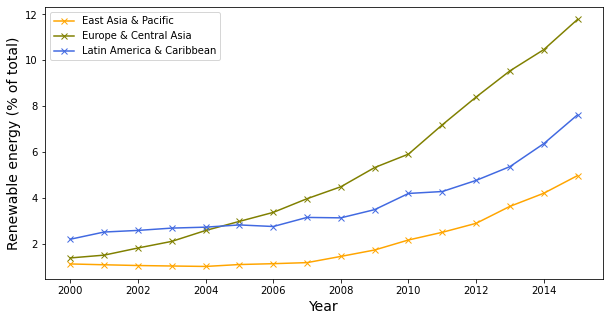

In [17]:
def plot_graph(name, colorname, label = None):
    name.plot.line( y="Renewable excluding hydroelectric (% of total)",
                  color = colorname, label=label, ax=ax, marker = "x")
    ax.set_xlabel("Year", fontsize=14)
    ax.set_ylabel("Renewable energy (% of total)", fontsize=14)

fig, ax = plt.subplots(figsize=(10,5))

plot_graph(eastasia_percentage_df, "orange", region_list[0])

plot_graph(europe_percentage_df, "olive", region_list[1])

plot_graph(latin_percentage_df, "royalblue", region_list[3])

fig.savefig("renewable_percentage.png")

# Part 2

We want to investigate if there are any relation between GDP and the percentage contribution of coal. So we put the percentage contribution of coal on y-axis and GDP on x-axis. We decide to put the countries in to four different groups: `high`, `upper_middle`, `lower_middle` and `low`. The different income group can be found in `country_code_df`.

In [19]:
def plot_scatter(income_group, yaxis, colorname = None, label = None):
    income_group.plot.scatter(x="GDP",
                              y=yaxis,
                              color = colorname,
                              label=label, 
                              ax=ax,
                              alpha=0.5)
    ax.set_xlabel("GDP", fontsize=14)
    ax.set_ylabel("Hydroelectric (% of total)", fontsize=14)
    
def income_group_selector(groupname, year):
    for i in region_list:
        group = country_code_df[(country_code_df["IncomeGroup"]==groupname) &
                                (country_code_df["TableName"] != i)]
    group_df = combine_energy_supply_df.loc[group.index]
    # Set index coloumn as "Year"
    group_df = group_df.set_index("Year")
    return group_df.loc[year]

# We choose to look at specifically in the year 2010
high = income_group_selector("High income", 2010)
upper_middle = income_group_selector("Upper middle income", 2010)
lower_middle = income_group_selector("Lower middle income", 2010)
low = income_group_selector("Low income", 2010)

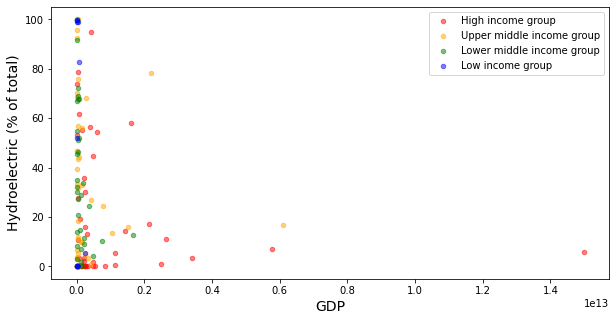

In [20]:
fig, ax = plt.subplots(figsize=(10,5))

y="Hydroelectric (% of total)"

plot_scatter(high, y, "red", "High income group")
plot_scatter(upper_middle, y, "orange", "Upper middle income group")
plot_scatter(lower_middle, y, "green", "Lower middle income group")
plot_scatter(low, y, "blue", "Low income group")

fig.savefig("hydroelectric.png")

Choosing one electricity sector and compare how this varies over time between all Income Groups

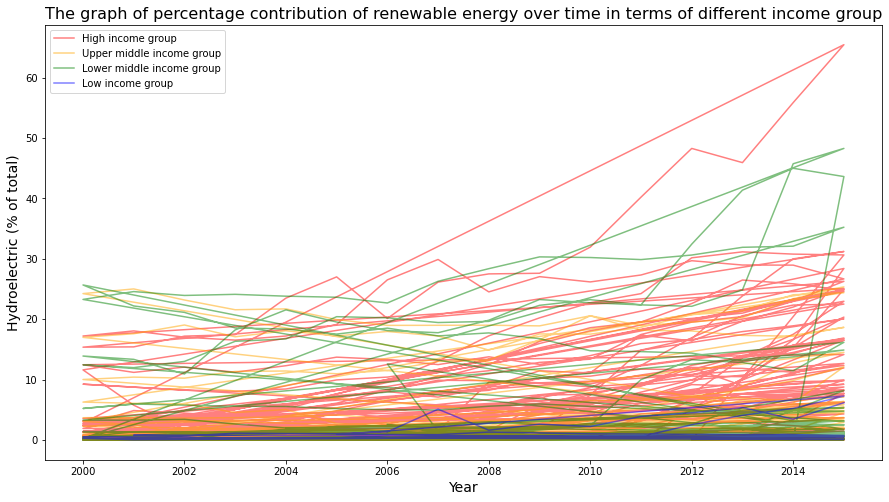

In [13]:
# Define function to plot the graph.
def plot_line(income_group, yaxis, colorname = None, label = None):
    income_group.plot.line(y=yaxis,
                           color = colorname,
                           label=label, 
                           ax=ax,
                           alpha=0.5)
    ax.set_xlabel("Year", fontsize=14)
    ax.set_ylabel("Hydroelectric (% of total)", fontsize=14)
    ax.set_title("The graph of percentage contribution of renewable energy over time in terms of different income group",
                fontsize = 16)

# Define function to select the income group
def income_group_selector(groupname):
    for i in region_list:
        group = country_code_df[(country_code_df["IncomeGroup"]==groupname) &
                                (country_code_df["TableName"] != i)]
    group_df = combine_energy_supply_df.loc[group.index]
    # Use filter, choose the time later than year 2000
    group_df = group_df[(group_df["Year"] >= 2000) & (group_df["Renewable excluding hydroelectric (% of total)"] > 0)]
    # Set index coloumn as "Year"
    group_df = group_df.set_index("Year")
    return group_df

high = income_group_selector("High income")
upper_middle = income_group_selector("Upper middle income")
lower_middle = income_group_selector("Lower middle income")
low = income_group_selector("Low income")

fig, ax = plt.subplots(figsize=(15,8))

y="Renewable excluding hydroelectric (% of total)"

plot_line(high, y, "red", "High income group")
plot_line(upper_middle, y, "orange", "Upper middle income group")
plot_line(lower_middle, y, "green", "Lower middle income group")
plot_line(low, y, "blue", "Low income group")

fig.savefig("income group.png")